# Decision Trees for Regression

In this Jupyter notebook we're going to explore Decision Trees for Regression using sklearn

## Decision Trees for sklearn

* New dataset
* Show DecisionTreeRegression default
* Graph the tree

$ conda install python-graphviz

In [14]:
import numpy as np

In [16]:
population_x = np.array([18., 18., 19., 19., 20., 20., 21., 21., 22., 22., 23., 23., 24.,
       24., 25., 25., 26., 26., 27., 27., 28., 28., 29., 29., 30., 30.,
       31., 31., 32., 32., 33., 33., 34., 34., 35., 35., 36., 36., 37.,
       37., 38., 38., 39., 39., 40., 40., 41., 41., 42., 42., 43., 43.,
       44., 44., 45., 45., 46., 46., 47., 47., 48., 48., 49., 49., 50.,
       50., 51., 51., 52., 52., 53., 53., 54., 54., 55., 55., 56., 56.,
       57., 57.])

In [17]:
population_y = np.array([0.0936378 , 0.26880022, 0.01286997, 0.21829509, 6.30495768,
       6.79387177, 7.15167215, 7.588539  , 3.18463984, 4.13177208,
       4.93660806, 3.15777376, 4.90023736, 4.61566414, 4.63096883,
       2.99957384, 4.88480713, 2.01064464, 2.61717579, 3.45577762,
       1.16591945, 1.04323783, 1.05879073, 1.09829244, 1.41650889,
       1.09669347, 1.35195093, 1.25152003, 1.33305345, 1.67960142,
       1.66711464, 1.58111642, 1.61144974, 1.7306984 , 3.79038628,
       3.78313261, 3.10384442, 3.63619907, 3.14061933, 3.58051467,
       3.91212182, 3.97963417, 3.10160787, 3.04266476, 3.17419592,
       3.19755397, 3.8208294 , 3.29446197, 3.91271289, 3.86450402,
       3.81427852, 3.98268471, 4.06183769, 4.12195402, 3.96532468,
       4.04005385, 3.93121749, 3.97545713, 4.12116895, 4.12336998,
       3.82144007, 4.07264366, 3.90014206, 3.968496  , 8.89713724,
       8.90747651, 8.92907406, 9.00203369, 8.91629547, 8.96433429,
       8.83054551, 9.12530698, 8.99284101, 8.96788059, 8.83998309,
       8.95564086, 8.9020359 , 8.82998949, 9.05967689, 9.00079263])

In [18]:
population_y.shape

(80,)

## Split data into train/test & fit

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(population_x, population_y, test_size=0.20, random_state=42)

regressor = DecisionTreeRegressor().fit(X_train.reshape(-1, 1), y_train)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

training_mse = mean_squared_error(y_train, regressor.predict(X_train.reshape(-1, 1)))
print("Training set mean squared error: {:.3f}".format(training_mse))

Training set mean squared error: 0.102


In [22]:
test_error = mean_squared_error(y_test, regressor.predict(X_test.reshape(-1, 1)))
print("Test set mean squared error: {:.3f}".format(test_error))

Test set mean squared error: 0.279


In [23]:
regressor

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
n_nodes = regressor.tree_.node_count
print("Number of nodes:", n_nodes)

Number of nodes: 77


### Visualise the graph

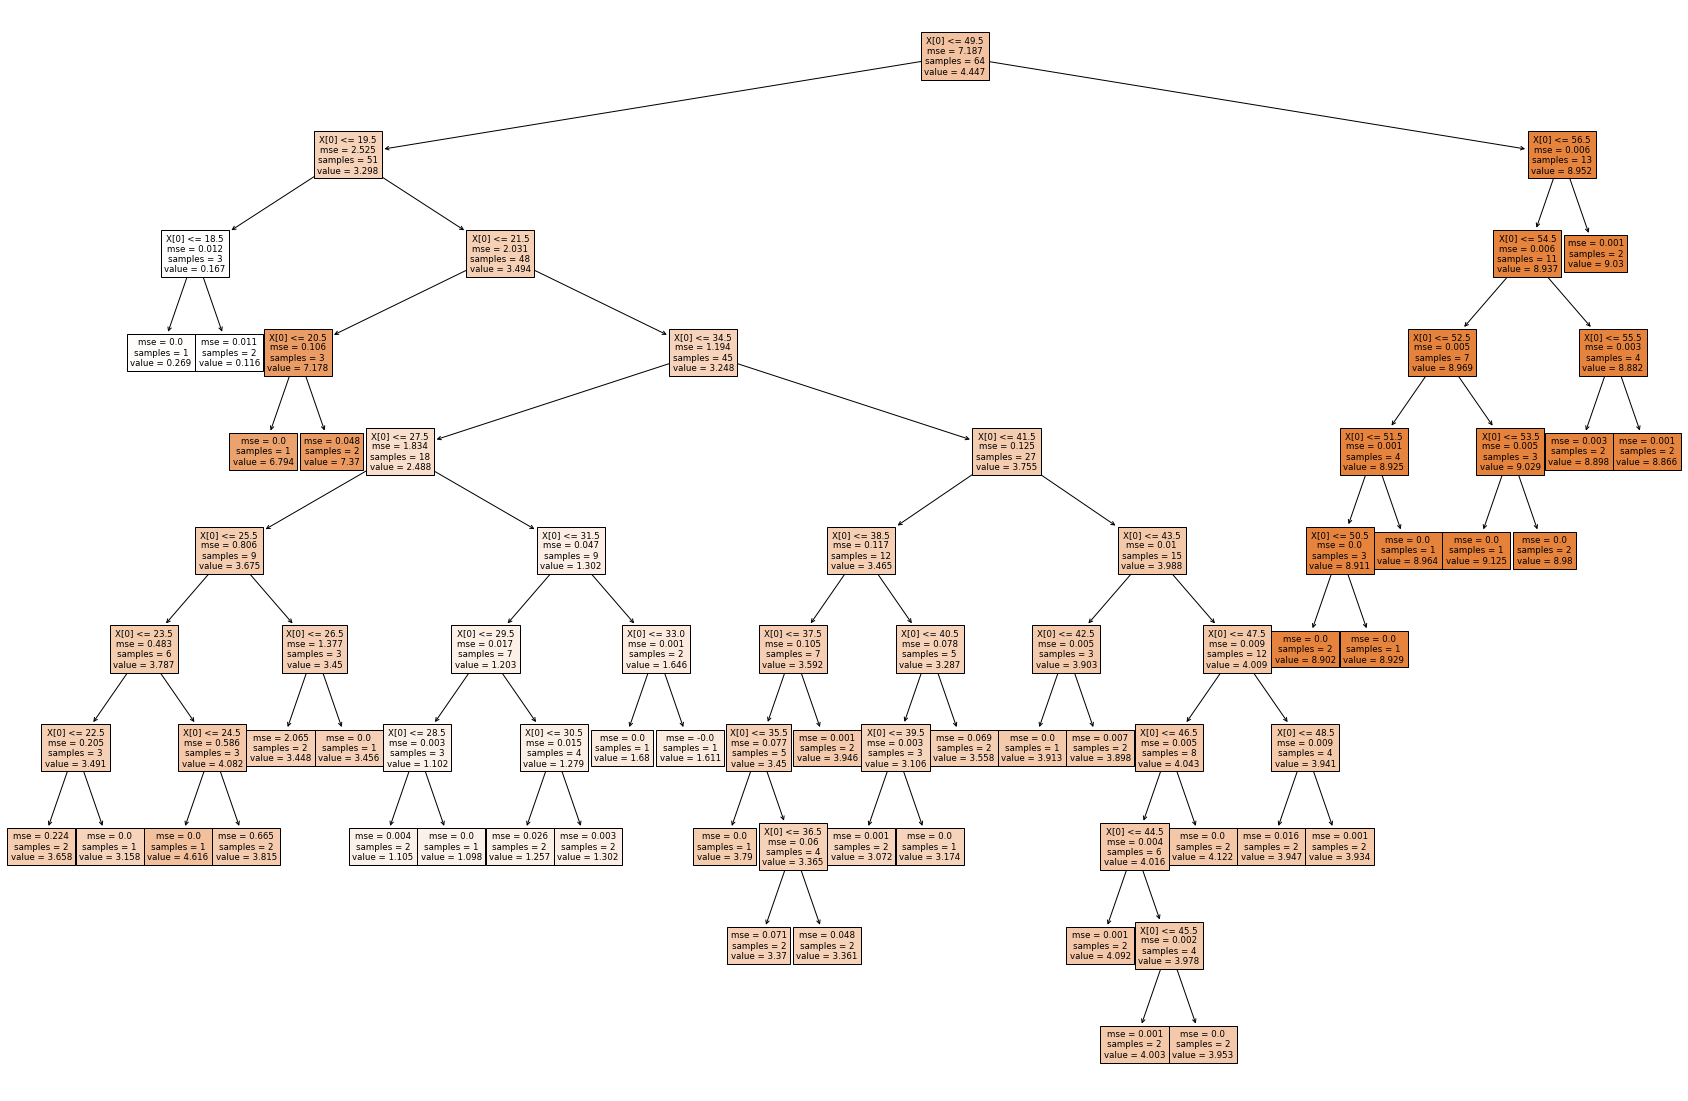

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))
plot_tree(regressor, filled=True)
plt.show()

In [30]:
np.mean(y_train)

4.446607425

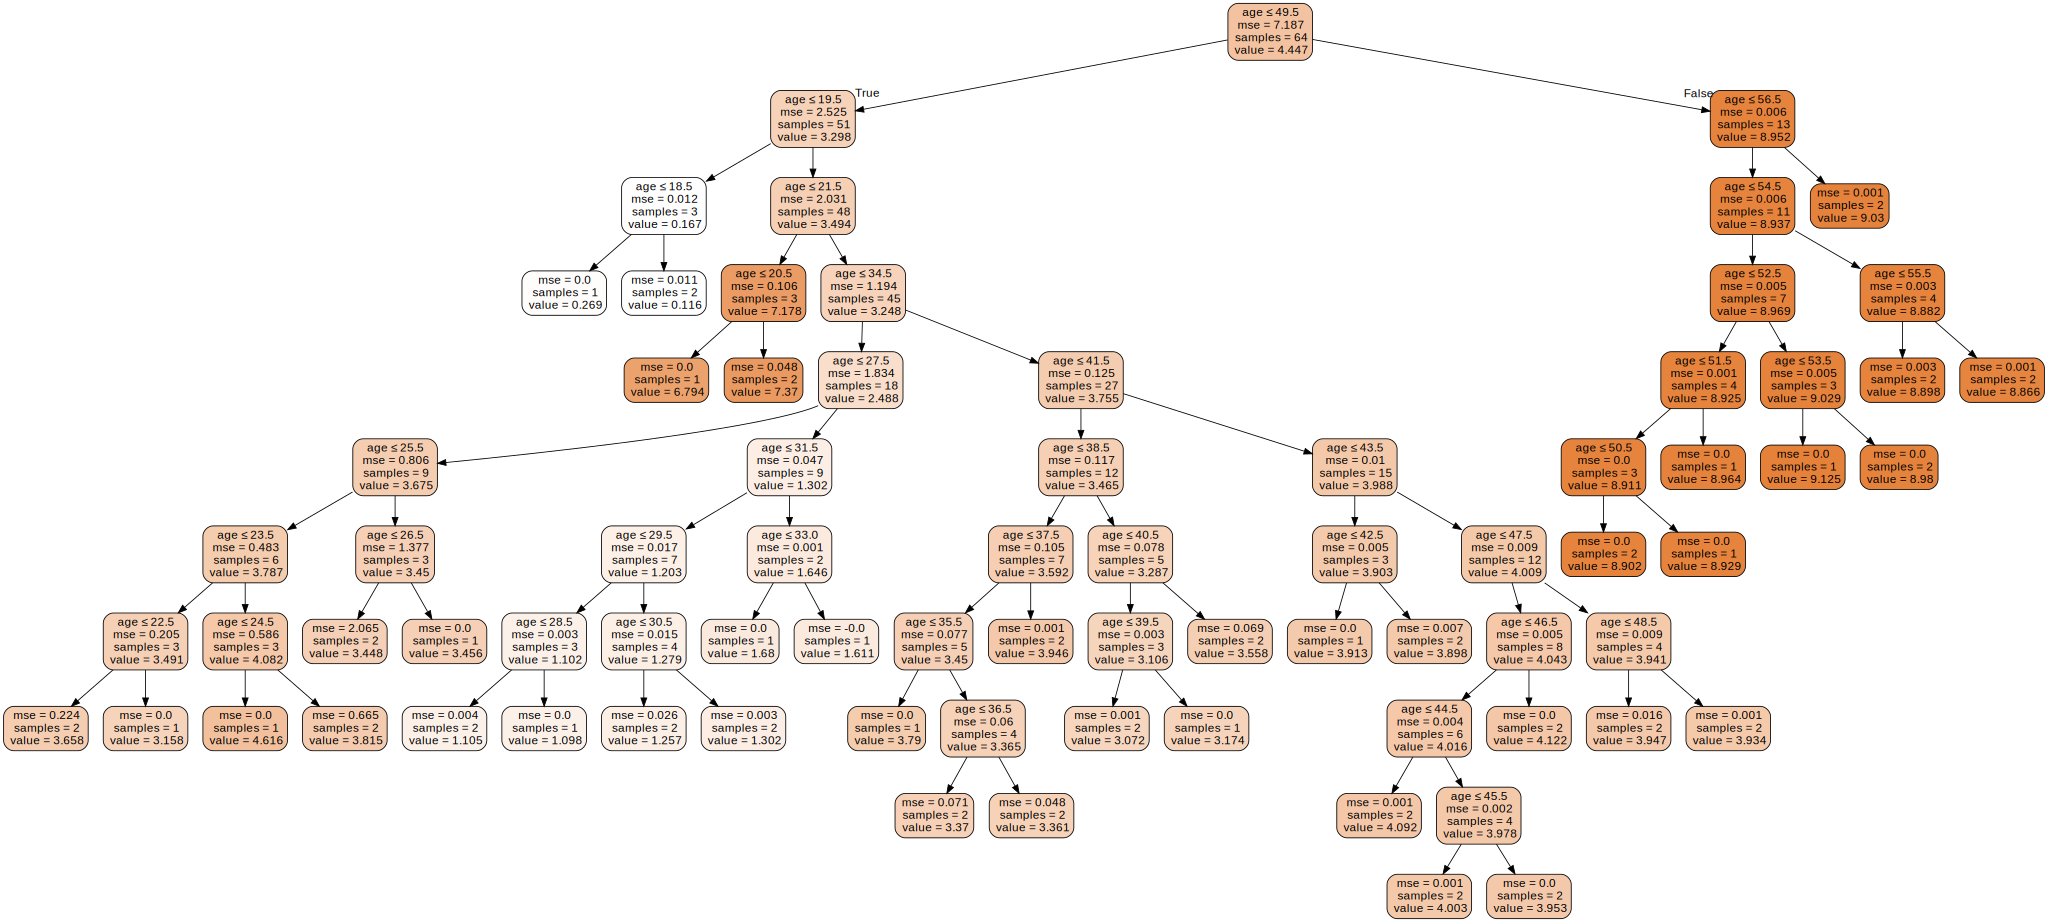

In [28]:
## you'll have to install this library. Note: graphiz
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(regressor, out_file=None, feature_names=['age'], filled=True, 
                                rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

The darker the colour, the higher the value

In [ ]:
dot_data = export_graphviz(regressor, feature_names=X.columns.values, filled=True, 
                                rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)

graph.render("decision-tree")

### Text mode

In [61]:
from sklearn.tree.export import export_text
r = export_text(regressor, feature_names=['age'])
print(r)

|--- age <= 49.50
|   |--- age <= 19.50
|   |   |--- age <= 18.50
|   |   |   |--- value: [0.27]
|   |   |--- age >  18.50
|   |   |   |--- value: [0.12]
|   |--- age >  19.50
|   |   |--- age <= 21.50
|   |   |   |--- age <= 20.50
|   |   |   |   |--- value: [6.79]
|   |   |   |--- age >  20.50
|   |   |   |   |--- value: [7.37]
|   |   |--- age >  21.50
|   |   |   |--- age <= 34.50
|   |   |   |   |--- age <= 27.50
|   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |--- age <= 23.50
|   |   |   |   |   |   |   |--- age <= 22.50
|   |   |   |   |   |   |   |   |--- value: [3.66]
|   |   |   |   |   |   |   |--- age >  22.50
|   |   |   |   |   |   |   |   |--- value: [3.16]
|   |   |   |   |   |   |--- age >  23.50
|   |   |   |   |   |   |   |--- age <= 24.50
|   |   |   |   |   |   |   |   |--- value: [4.62]
|   |   |   |   |   |   |   |--- age >  24.50
|   |   |   |   |   |   |   |   |--- value: [3.82]
|   |   |   |   |   |--- age >  25.50
|   |   |   |   |   |   |--- a